# APA Laboratori 4 - Sistemes lineals (regularitzats)

veiem que les matrius $A·A^T$ i $A^T·A$ són diferents

 definim $i$

In [91]:
i <- sqrt(as.complex(-1))

i la matriu

In [92]:
(A <- matrix(c(0,i,0,1),nrow=2,byrow = TRUE))

0+0i,0+1i
0+0i,1+0i


$A\cdot A^T$ és la matriu (-1 i; i 1)

In [93]:
(A %*% t(A))  

-1+0i,0+1i
0+1i,1+0i


$A^T \cdot A$ és la matriu tot zeros

In [94]:
(t(A) %*% A)  

0+0i,0+0i
0+0i,0+0i


***

## EXEMPLE 1

 Resolució d'un problema artificial senzill


 Definició del sistema lineal a resoldre
 
 $t = f(x) + \epsilon$
 
on $f(x) = (1 + 1/9)(x-1) + 10$ i $\epsilon \sim N(0,1)$

In [95]:
N <- 10

X <- matrix(c(rep(1,N), seq(N)),nrow=N)

X

1,1
1,2
1,3
1,4
1,5
1,6
1,7
1,8
1,9
1,10


In [96]:
t <- seq(10,20,length.out=N) + rnorm(N)

t

[1]  9.560042 12.374763 13.246331 12.429709 16.669516 15.128933 14.794091
 [8] 17.826817 18.630168 19.537338

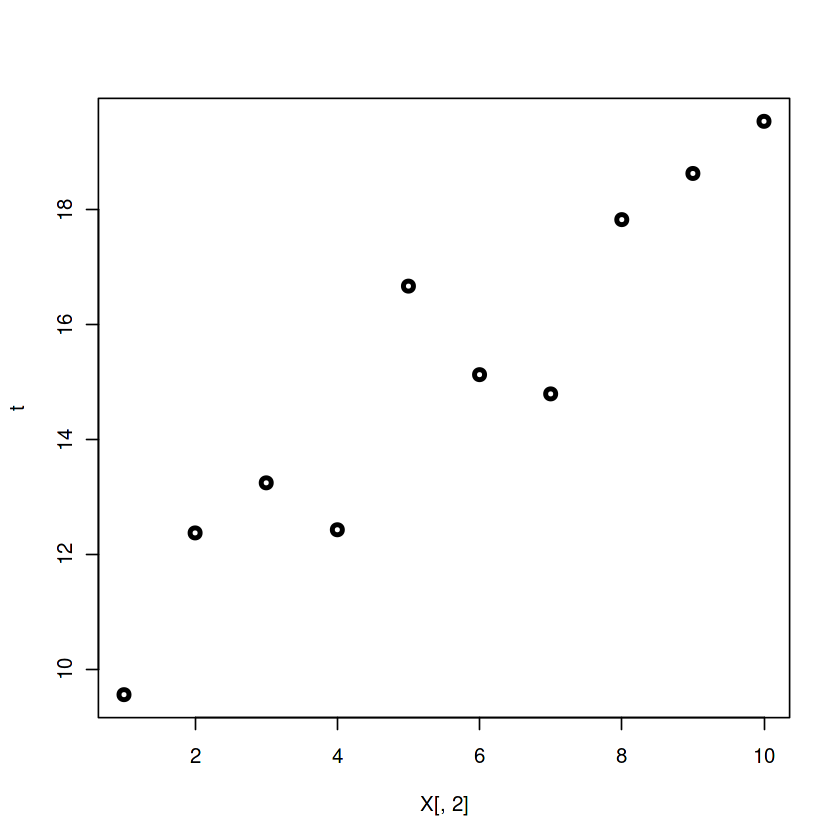

In [97]:
plot(X[,2],t,lwd=3)


### Solució de problemes de mínims quadrats de l'estil 

$\min_w || t - Xw ||^2$

1) Resolució mitjançant la pseudo-inversa

$X^T \cdot X$

In [98]:
(C <- t(X) %*% X)  

10,55
55,385


$(X^T \cdot X)^{-1} \cdot X^T$

In [99]:
(X.pseudo <- solve(C) %*% t(X))  

0.40000000,0.33333333,0.26666667,0.20000000,0.133333333,0.066666667,1.387779e-17,-0.06666667,-0.13333333,-0.20000000
-0.05454545,-0.04242424,-0.03030303,-0.01818182,-0.006060606,0.006060606,1.818182e-02,0.03030303,0.04242424,0.05454545


In [100]:
(X.pseudo %*% X) # és pseudo-inversa esquerra d'X

1.000000e+00,1.054712e-15
2.081668e-17,1.000000e+00


In [101]:
(w <- X.pseudo %*% t) # solució del problema

9.6184877
0.9820515


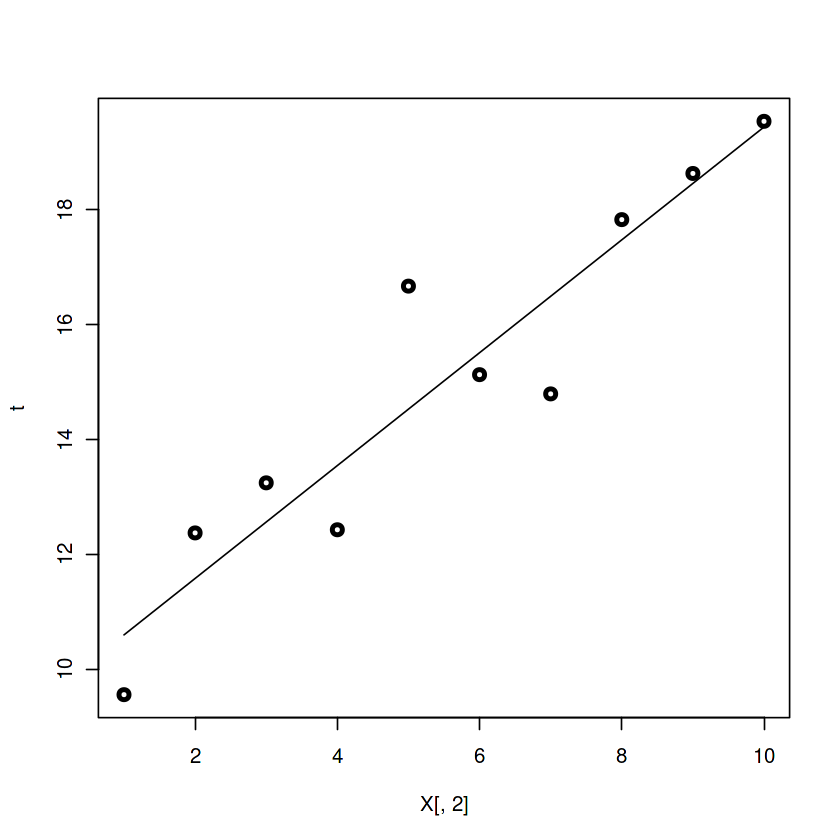

In [102]:
plot(X[,2],t,lwd=3)
lines (X[,2], w[2,1]*X[,2]+w[1,1], type="l")

2) Resolució mitjançant la SVD

In [103]:
(s <- svd(X))

0.0571102,0.58497262
0.1070474,0.48685286
0.1569846,0.38873309
0.2069218,0.29061332
0.2568590,0.19249355
0.3067962,0.09437379
0.3567334,-0.00374598
0.4066706,-0.10186575
0.4566078,-0.19998551
0.5065449,-0.29810528
0.1421813,0.9898406


Les dues columnes d'X són linealment independents, i per tant els dos valors singulars són diferents de 0; en altres paraules, $rang(X) = 2 = min(10,2)$, per tant X és "full rank"

ara comprovem que $X = U D V^T$

In [104]:
D <- diag(s$d)
s$u %*% D %*% t(s$v)


1,1
1,2
1,3
1,4
1,5
1,6
1,7
1,8
1,9
1,10


Ara ho apliquem a la solució del problema de mínims quadrats

$\min_w || t - Xw ||^2$

In [105]:
D <- diag(1/s$d)
(w <- s$v %*% D %*% t(s$u) %*% t)

9.6184877
0.9820515


noteu que obtenim la mateixa solució

La rutina `glm()` implementa regressió lineal per mínims quadrats si li demanem
 mitjançant el paràmetre `family = gaussian`

In [106]:
(mostra <- data.frame(x=X,t=t))

x.1,x.2,t
1,1,9.560042
1,2,12.374763
1,3,13.246331
1,4,12.429709
1,5,16.669516
1,6,15.128933
1,7,14.794091
1,8,17.826817
1,9,18.630168
1,10,19.537338


 Noteu que glm sempre afegeix un terme *intercept* o *offset* (un regressor constant 1) per defecte, així que tenim dues opcions:

 1) desactivar-lo (el "-1" a la fòrmula següent) i usar la nostra pròpia columna de 1's

In [107]:
model1 <- glm (t ~ x.2 + x.1 - 1, data=mostra, family = gaussian)

2) usar la que glm ja posa (recomanat) i desactivar la nostra pròpia columna de 1's

In [108]:
model2 <- glm (t ~ x.2, data=mostra, family = gaussian)

 Els coefficients (el vector w)

In [109]:
model1$coefficients
model2$coefficients

x.2       x.1 
0.9820515 9.6184877

(Intercept)         x.2 
  9.6184877   0.9820515

** Per què la SVD?**

  a. En formar la matriu $X^T X$ es pot perdre informació

In [110]:
eps <- 1e-3
(X.eps <- matrix(c(1,eps,0,1,0,eps),nrow=3))

1.000,1.000
0.001,0.000
0.000,0.001


In [111]:
((C.eps <- t(X.eps) %*% X.eps))  

1.000001,1.000000
1.000000,1.000001


In [112]:
solve(C.eps) # comencem a tenir problemes ...

500000.3,-499999.8
-499999.8,500000.3


In [113]:
eps <- 1e-10
(X.eps <- matrix(c(1,eps,0,1,0,eps),nrow=3))

1e+00,1e+00
1e-10,0e+00
0e+00,1e-10


In [114]:
(C.eps <- t(X.eps) %*% X.eps)

1,1
1,1


In [115]:
solve(C.eps) # dóna error (la matriu 2x2 "tot uns" és singular)

ERROR: Error in solve.default(C.eps): Lapack routine dgesv: system is exactly singular: U[2,2] = 0


 (el determinant és 1·1 - 1·1 = 0)

 però no ho hauria de ser ... aquesta no és la nostra matriu ...
 el problema és que l'operacio $X^T$ X fa perdre molta precissió numèrica (hem perdut epsilon)

b. El número de condició d'una matriu

 El número de condició d'una matriu és el producte entre la norma de la matriu
 i la norma de la seva inversa
 Dóna una indicació de l'exactitud dels resultats de la inversió d'una matriu
 Valors prop d'1 indiquen una matriu ben condicionada

 El número de condició de la matriu $X^T X$ és el quadrat del de la matriu $X$

 Incidentalment, el número de condició corresponent a usar la norma-2 equival al quocient entre el valor singular més gran i el més petit (no nul) de la matriu

 La rutina `kappa()` calcula el número de condició

In [147]:
kappa(X, exact=TRUE)

kappa(t(X) %*% X, exact=TRUE)

[1] 11482.12

[1] 131839106

veiem-ho amb un exemple:

In [148]:
(X <- matrix(c(rep(1,N), 100+seq(N)),nrow=N))

1,101
1,102
1,103
1,104
1,105
1,106
1,107
1,108
1,109
1,110
1,111


In [149]:
kappa(X, exact=TRUE)

kappa(t(X) %*% X, exact=TRUE)

[1] 2123.465

[1] 4509104

Una solució molt senzilla és centrar la segona columna:

In [150]:
X <- matrix(c(rep(1,N), 100+seq(N)),nrow=N)

X[,2] <- X[,2] - mean(X[,2])

X

1,-9.5
1,-8.5
1,-7.5
1,-6.5
1,-5.5
1,-4.5
1,-3.5
1,-2.5
1,-1.5
1,-0.5
1,0.5


In [151]:
kappa(X, exact=TRUE)

kappa(t(X) %*% X, exact=TRUE)

[1] 5.766281

[1] 33.25

Hi ha una relació senzilla entre els dos sistems lineals; en altres paraules, podem "post-processar els coeficients de sortida perquè corresponguin a la matriu inicial

 Nota: hi ha una rutina que calcula directament la pseudo-inversa (ho fa via la SVD):

In [152]:
library(MASS)

ginv(X)

0.05000000,0.05000000,0.0500000,0.050000000,0.050000000,0.050000000,0.050000000,0.050000000,0.050000000,0.0500000000,0.0500000000,0.050000000,0.050000000,0.050000000,0.050000000,0.050000000,0.050000000,0.0500000,0.05000000,0.05000000
-0.01428571,-0.01278195,-0.0112782,-0.009774436,-0.008270677,-0.006766917,-0.005263158,-0.003759398,-0.002255639,-0.0007518797,0.0007518797,0.002255639,0.003759398,0.005263158,0.006766917,0.008270677,0.009774436,0.0112782,0.01278195,0.01428571


***

## EXEMPLE 2

 Anem a analitzar dades de greix corporal
 mitjançant regressió normal i ridge (regularitzada)


In [153]:
bodyfat.data <- read.table(file = "bodyfatdata.txt", header=FALSE, col.names = c('triceps', 'thigh', 'midarm', 'bodyfat'))

summary(bodyfat.data)

attach(bodyfat.data)

N <- nrow(bodyfat.data)

    triceps          thigh           midarm         bodyfat     
 Min.   :14.60   Min.   :42.20   Min.   :21.30   Min.   :11.70  
 1st Qu.:21.50   1st Qu.:47.77   1st Qu.:24.75   1st Qu.:17.05  
 Median :25.55   Median :52.00   Median :27.90   Median :21.20  
 Mean   :25.30   Mean   :51.17   Mean   :27.62   Mean   :20.20  
 3rd Qu.:29.90   3rd Qu.:54.62   3rd Qu.:30.02   3rd Qu.:24.27  
 Max.   :31.40   Max.   :58.60   Max.   :37.00   Max.   :27.20  

The following objects are masked from bodyfat.data (pos = 3):

    bodyfat, midarm, thigh, triceps

The following objects are masked from bodyfat.data (pos = 7):

    bodyfat, midarm, thigh, triceps

The following objects are masked from bodyfat.data (pos = 8):

    bodyfat, midarm, thigh, triceps



 let us start with standard linear regression
 this time we directly use the method `lm()`; 

`lm()` is actually called by glm() for gaussian noise and is the workhorse for least squares

In [154]:
(model <- lm(bodyfat ~ ., data = bodyfat.data))
summary(model)


Call:
lm(formula = bodyfat ~ ., data = bodyfat.data)

Coefficients:
(Intercept)      triceps        thigh       midarm  
    117.085        4.334       -2.857       -2.186  



Call:
lm(formula = bodyfat ~ ., data = bodyfat.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7263 -1.6111  0.3923  1.4656  4.1277 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  117.085     99.782   1.173    0.258
triceps        4.334      3.016   1.437    0.170
thigh         -2.857      2.582  -1.106    0.285
midarm        -2.186      1.595  -1.370    0.190

Residual standard error: 2.48 on 16 degrees of freedom
Multiple R-squared:  0.8014,	Adjusted R-squared:  0.7641 
F-statistic: 21.52 on 3 and 16 DF,  p-value: 7.343e-06


 How to read this output:

 $x = (1,triceps, thigh, midarm)^T$

$w = (117.085, 4.334, -2.857, -2.186)^T$

 the model is $y(x; w) = w^T x = 117.085 + 4.334*triceps -2.857*thigh -2.186*midarm$

 The residuals are the differences $(t_n - y(x_n; w)), n = 1,\dots N$
 
 let's inspect `model$residuals`

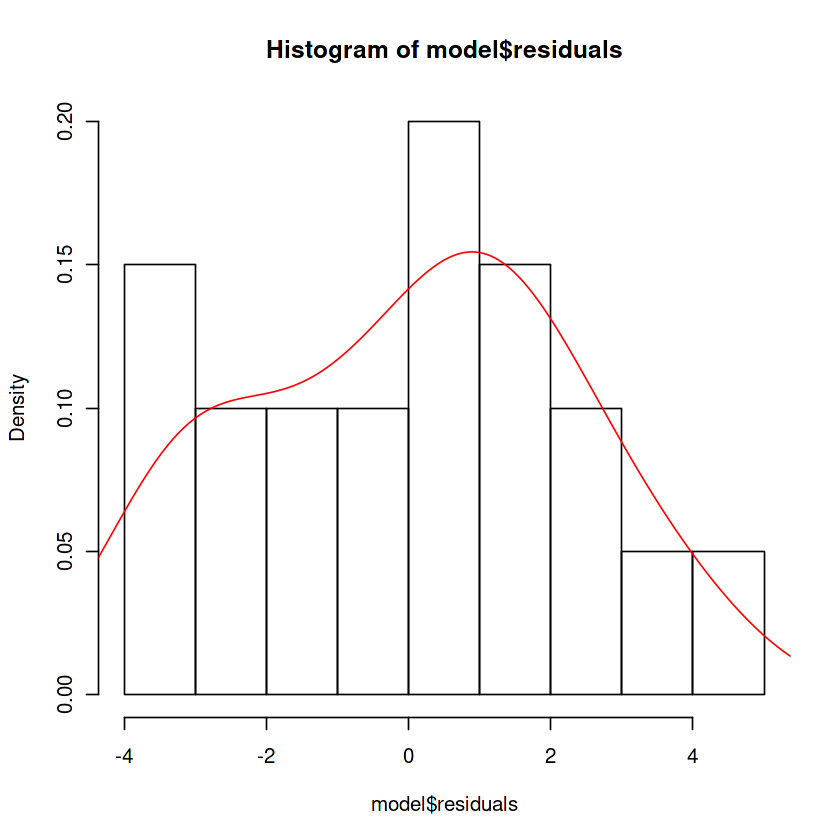

In [155]:
dens <- density(model$residuals)
hist(model$residuals, prob=T)
lines(dens,col="red")

 Do the residuals look Gaussian? this is direct indication of model validity
 (since it was our departing assumption)

 Let's do a more informative plot (a QQ-plot), which plots actual quantiles
 against theoretical quantiles of a comparison distribution (Gaussian in this case)

In [156]:
library(car)
qqPlot(model)

ERROR: Error in library(car): there is no package called ‘car’


 The solid line corresponds to the theoretical quantiles
 therefore in this case the residuals are not even close 
 (the tails are heavier, the central part is flatter)

 This is how we can compute the mean square error

In [157]:
prediction <- predict(model)
(mean.square.error <- sum((bodyfat - prediction)^2)/N)

[1] 4.920244

 Is this number large or small? it depends on the magnitude of the targets!
 a very good practice is to normalise it, by dividing by the variance of the target:

In [158]:
(norm.mse <- sum((bodyfat - prediction)^2) / ((N-1)*var(bodyfat)))

[1] 0.1986414

 If we divide the mean square error by the variance of the targets t,
 we get the proportion of the variability of the target that is NOT explained by the model

 A model with 'norm.mse' equal to 1 is as good as the best constant model
 (namely, the model that always outputs the average of the target)

 models with 'norm.mse' above 0.5 are so so, beyond 0.7 they begin to be quite bad

 models with 'norm.mse' below 0.2 are quite good

 The Multiple R-squared (usually used by statisticians) is obtained by subtracting this quantity form one; that is, the proportion of the target variability that is explained by the model; in this case it reaches 80%

In [159]:
(R.squared <- (1 - norm.mse)*100)

[1] 80.13586

 The "adjusted R-squared" is the same thing, but adjusted for the complexity of the model,
 i.e. the number of parameters (three in our case)

 Now let us try to see how are the real predictions by plotting the real predictions against the targets:

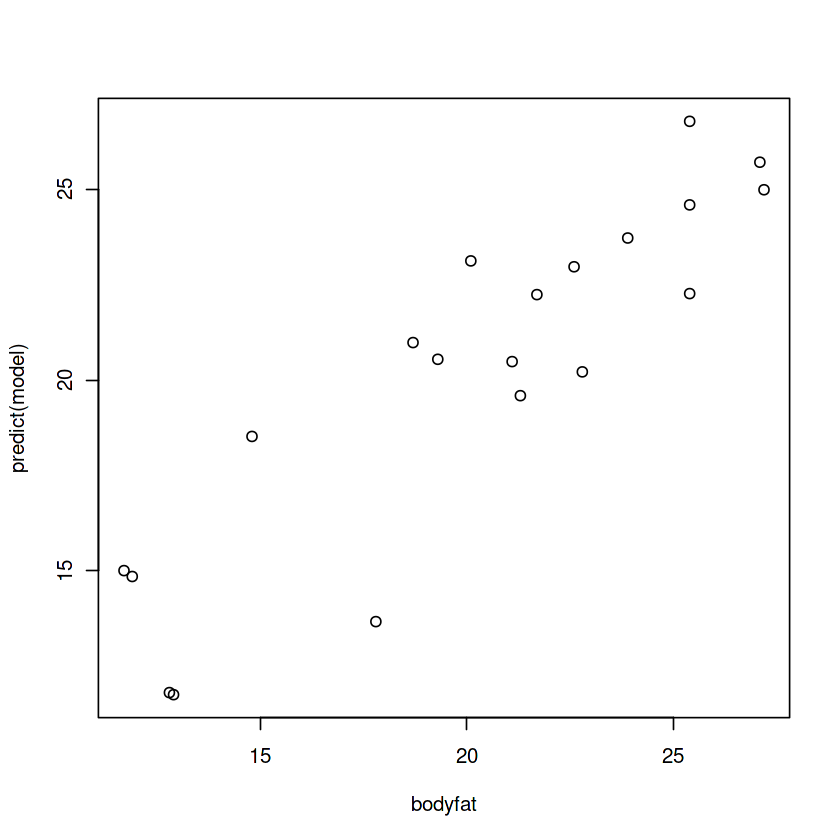

In [160]:
plot(bodyfat, predict(model))

 It is difficult to see if the model is a good predictor; what we need is a
 numerical assessment of predictive ability. We compute the exact LOOCV as seen in class:
 
 $LOOCV = \frac{1}{N} \sum_{i=1}^{N} \left(\frac{y_i - \hat{y}_i}{1-h_i}\right)^2$
 
 where $H = X (X^TX)^{-1}X^T$ and $h_i = diag(H)_i$

In [161]:
(LOOCV <- sum( (model$residuals/(1-ls.diag(model)$hat))^2) / N)

[1] 8.036828

 and the corresponding predictive R-square 

In [162]:
(R2.LOOCV = (1 - LOOCV*N/((N-1)*var(bodyfat)))*100)

[1] 67.5535

 we can see that prediction quality is not as good as it seemed (since CV error is worse than training error)

 this last number is the one I recommend to do model selection!!!

---

 Let us continue now with *regularized linear regression* (aka ridge regression)
 this time we need to use the method lm.ridge()

 We must first choose a value for lambda (the regularization constant)
 there are several criteria to do this, the most used of which is the GCV
 so we optimize the GCV for several values of lambda in a sequence

In [163]:
library(MASS)

notice we start with a wide logarithmic search

In [164]:
lambdas <- 10^seq(-6,2,0.1)

select(lm.ridge(bodyfat ~ triceps + thigh + midarm, lambda = lambdas))

modified HKB estimator is 0.008505093 
modified L-W estimator is 0.3098511 
smallest value of GCV  at 0.01995262 


 best value (according to GCV) is 0.01995262

 we perform a finer search

In [165]:
lambdas <- seq(0,1,0.001)

select(lm.ridge(bodyfat ~ triceps + thigh + midarm, lambda = lambdas))

modified HKB estimator is 0.008505093 
modified L-W estimator is 0.3098511 
smallest value of GCV  at 0.019 


 Definitely the best value is 0.019, so we refit the model with this precise value:

In [166]:
(bodyfat.ridge.reg <- lm.ridge(bodyfat ~ triceps + thigh + midarm, lambda = 0.019))

              triceps      thigh     midarm 
43.8401126  2.1174933 -0.9597309 -1.0180612 

 Now let us compare these results with those obtained by standard regression (without regularization)

 Hand calculation of coefficients, since we know the theory:

In [167]:
X <- cbind(rep(1,length=length(bodyfat)),triceps, thigh, midarm)

(w <- ginv(X) %*% bodyfat)

117.084695
4.334092
-2.856848
-2.186060


call to `lm()`, check they should coincide

In [168]:
model$coefficients

(Intercept)     triceps       thigh      midarm 
 117.084695    4.334092   -2.856848   -2.186060

 Notice that the regularized weights are smaller (in absolute value), one by one

 Now we calculate the corresponding prediction errors
 First by standard regression (without regularization, we already did this)

In [169]:
R2.LOOCV

[1] 67.5535

 Now those with ridge regression (with regularization):

In [170]:
(1 - bodyfat.ridge.reg$GCV)*100

0.019 
67.03948

 The prediction errors are quite close and the model is way simpler: 
 we would probably prefer the regularized one
 

---

Now we use the LASSO: here the coefficients are penalized by the L1 norm. The 
 optimal value for lambda is again chosen by cross-validation

In [171]:
library(glmnet)

t <- as.numeric(bodyfat.data[,4])
x <- as.matrix(bodyfat.data[,1:3])

model.lasso <- cv.glmnet (x, t, nfolds = length(t))

Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”

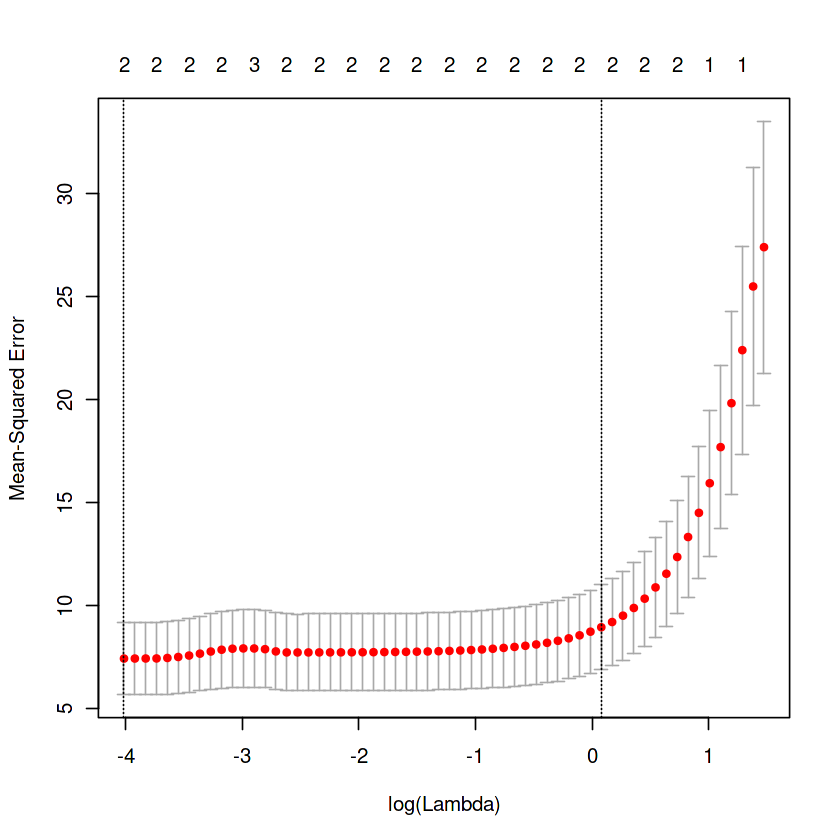

In [172]:
plot(model.lasso)

In [173]:
coef(model.lasso)

4 x 1 sparse Matrix of class "dgCMatrix"
                      1
(Intercept) -10.5932144
triceps       0.1088958
thigh         0.5478329
midarm        .        

 lambda.min is the value of lambda that gives minimum mean cross-validated error

In [174]:
model.lasso$lambda.min

[1] 0.01805755

Predictions can be made based on the fitted cv.glmnet object; for instance, this would be the TR error with the *optimal* lambda as chosen by LOOCV


In [175]:
predict (model.lasso, newx = x, s = "lambda.min")

1
13.80151
19.34897
21.59742
23.19321
12.64429
22.14266
26.26047
21.51608
18.87550
21.57901


And this would be corresponding LOOCV

In [176]:
(LOOCV <- model.lasso$cvm[model.lasso$lambda == model.lasso$lambda.min])

[1] 7.429245

and the corresponding predictive R-square  

In [177]:
(R2.LOOCV = (1 - LOOCV*N/((N-1)*var(bodyfat)))*100)

[1] 70.00645

 This LASSO method then seems to deliver a better model